In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Nifty 50 Historical Data - Cleaned.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2016-01-27,7437.75,7469.60,7477.90,7419.70,193390000.0,0.02
1,2016-01-28,7424.65,7426.50,7468.85,7409.60,283040000.0,-0.18
2,2016-01-29,7563.55,7413.35,7575.65,7402.80,307930000.0,1.87
3,2016-02-01,7555.95,7589.50,7600.45,7541.25,206640000.0,-0.10
4,2016-02-02,7455.55,7566.65,7576.30,7428.05,237340000.0,-1.33


In [3]:
df['Daily_Return'] = df['Price'].pct_change()

In [5]:
trading_days = 252

annual_volatility = df['Daily_Return'].std() * np.sqrt(trading_days)

annual_volatility

0.1615161621634296

### Sharpe Ratio (Index-Level)

In [8]:
risk_free_rate = 0.06

annual_return = df['Daily_Return'].mean() * trading_days

sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility

sharpe_ratio

0.47522003999864854

### Rolling Volatility

In [11]:
df['Vol_30D'] = df['Daily_Return'].rolling(30).std() * np.sqrt(trading_days)
df['Vol_90D'] = df['Daily_Return'].rolling(90).std() * np.sqrt(trading_days)
df['Vol_252D'] = df['Daily_Return'].rolling(252).std() * np.sqrt(trading_days)

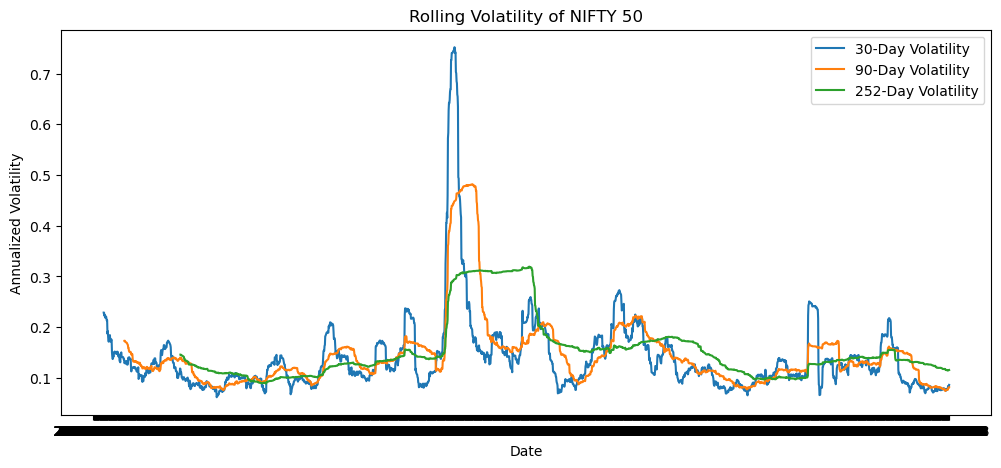

In [15]:
plt.figure(figsize = (12,5))
plt.plot(df['Date'], df['Vol_30D'], label = '30-Day Volatility')
plt.plot(df['Date'], df['Vol_90D'], label = '90-Day Volatility')
plt.plot(df['Date'], df['Vol_252D'], label = '252-Day Volatility')

plt.title('Rolling Volatility of NIFTY 50')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.show()

In [17]:
df[['Date','Vol_252D']].sort_values('Vol_252D', ascending = False).head()

,Date,Vol_252D
1262,2021-03-02,0.319295
1261,2021-03-01,0.319192
1260,2021-02-26,0.319040
1243,2021-02-03,0.317980
1242,2021-02-02,0.317941


### Risk Summary

In [21]:
risk_summary = pd.DataFrame({'Metric' : ['Annual Volatility','Sharpe Ratio'],
                               'Value' : [annual_volatility,sharpe_ratio]})
risk_summary

,Metric,Value
0,Annual Volatility,0.161516
1,Sharpe Ratio,0.475220
